# Exploratory Data Analysis -Ecommerce Customer Dataset

The Ecommerce customer Dataset consist of 500 rows and 8 columns. We will be doing the Exploratory data analysis on Ecommerce customer dataset and find the correlation between the variables and also the impact of the independent variables like Average session length, time on app, time on website, length of membership on the dependent variable yearly amount spent. The outliers in each of the variables are detected and removed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv("Ecommerce Customers.csv")

In [3]:
data.shape

(500, 8)

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
data.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

## Checking for null Values

In [9]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Checking for duplicated values

In [10]:
data.duplicated().sum()

0

## Dropping unnecessary columns 

In [11]:
df=data.drop(["Email","Address","Avatar"],axis=1)

In [12]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [14]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Scatterplot

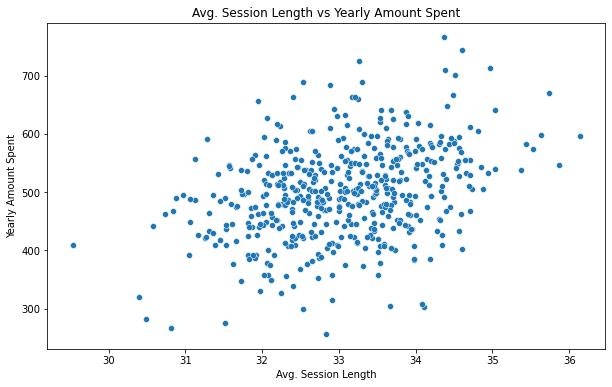

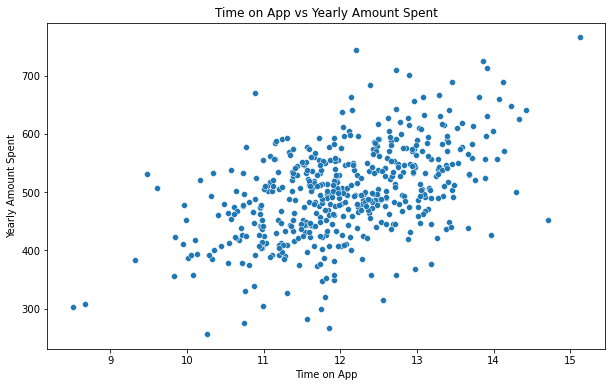

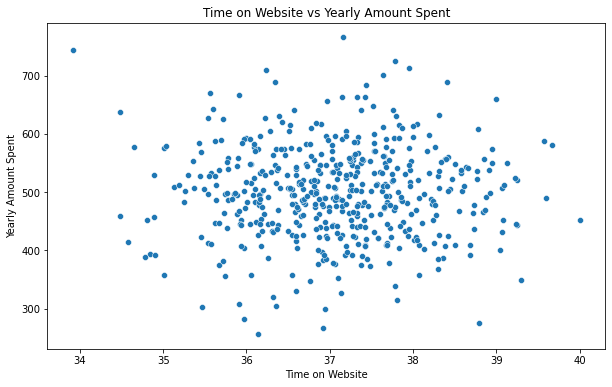

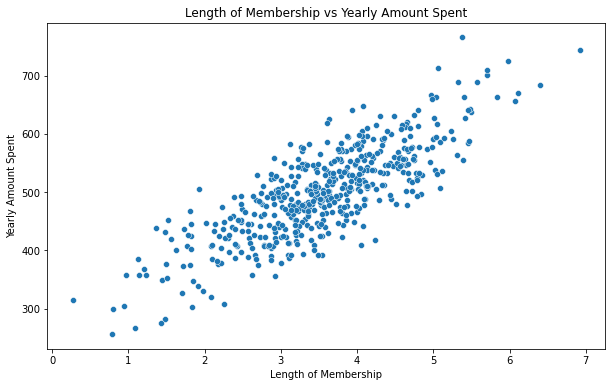

In [15]:
x_column_names=['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
for i in x_column_names:
  plt.figure(figsize=(10,6))
  fig=sns.scatterplot(x=i,y="Yearly Amount Spent",data=df)
  fig.set_title(f"{i} vs Yearly Amount Spent")
  plt.show()


## Outlier Detection

## BoxPlot 

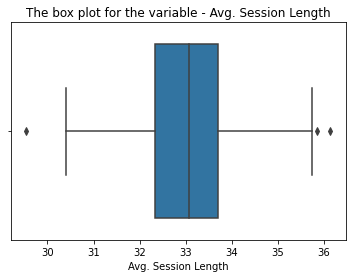

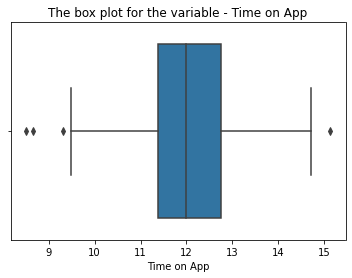

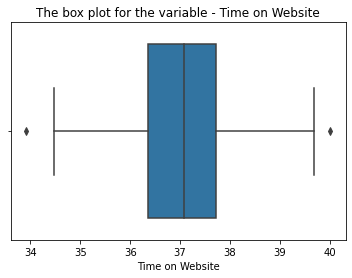

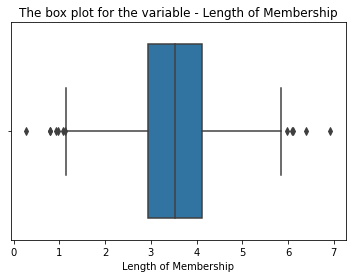

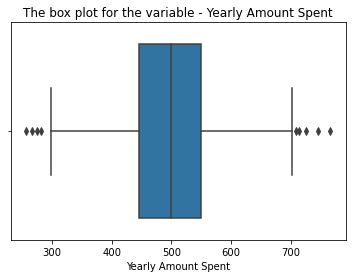

In [16]:
for i in df.columns:
  sns.boxplot(x=df[i]).set_title(f"The box plot for the variable - {i}")
  plt.show()

In [17]:
# outlier detection
def outlier_detection(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset_outliers=dataset[(dataset[i]<lower_limit) | (dataset[i]>upper_limit)][i].values
  print(f" the outliers in the {i} variable is {dataset_outliers}")

In [18]:
for i in df.columns:
  outlier_detection(df,i)

 the outliers in the Avg. Session Length variable is [29.53242897 36.13966249 35.86023651]
 the outliers in the Time on App variable is [15.12699429  8.50815218  9.3162892   8.66834952]
 the outliers in the Time on Website variable is [40.00518164 33.91384725]
 the outliers in the Length of Membership variable is [5.97676813 6.40122884 6.07665364 6.92268934 0.96862212 0.80151572
 0.78951991 1.0845853  1.13047696 6.11519895 0.9364976  0.26990109]
 the outliers in the Yearly Amount Spent variable is [725.58481406 765.51846194 744.2218671  712.39632681 256.67058229
 282.47124572 266.08634095 708.93518487 275.91842065]


## Outlier Removal 

In [19]:
#outlier removal
def outlier_removal(dataset,i):
  q1=dataset[i].quantile(.25)
  q3=dataset[i].quantile(.75)
  iqr=q3-q1
  lower_limit=q1-(1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset=dataset[(dataset[i]>lower_limit) & (dataset[i]<upper_limit)]
  return dataset

In [20]:
for i in df.columns:
  df=outlier_removal(df,i)

In [21]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,474.000000,474.000000,474.000000,474.000000,474.000000
mean,33.037405,12.066937,37.070146,3.547496,500.404266
std,0.943465,0.956327,0.996848,0.888891,69.000831
min,30.393185,9.477778,34.476878,1.200484,319.928870
25%,32.344967,11.395923,36.361896,2.967329,448.488642
50%,33.077133,11.983231,37.075583,3.535445,501.111368
75%,33.699025,12.760941,37.717324,4.115562,548.137737
max,35.630854,14.715388,39.672591,5.840506,689.787604


## Correlation

In [22]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.039729,-0.007856,0.000236,0.331589
Time on App,-0.039729,1.000000,0.065066,-0.055699,0.480231
Time on Website,-0.007856,0.065066,1.000000,-0.053180,-0.005199
Length of Membership,0.000236,-0.055699,-0.053180,1.000000,0.761956
Yearly Amount Spent,0.331589,0.480231,-0.005199,0.761956,1.000000


<AxesSubplot:>

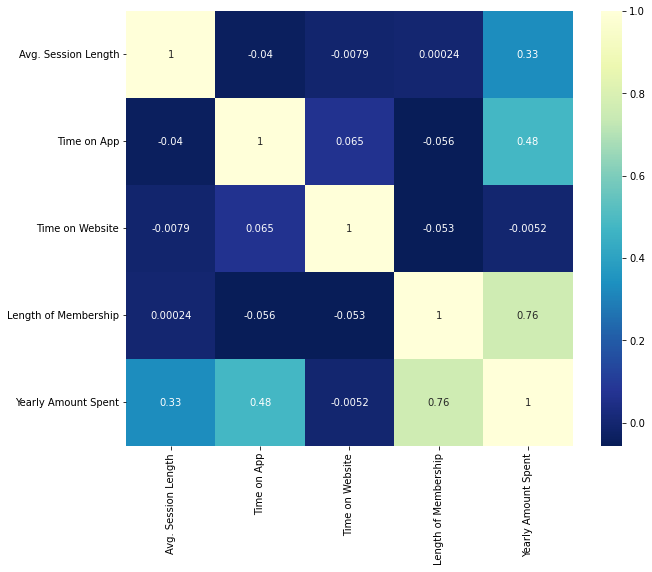

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu_r")

From the heatmap we can notice that their is a less negative or nearly zero correlation between the Time on Website and the Yearly amount Spent.
There is a high positive correlation between the length of Membership and the yearly amount spent.

## Pairplot

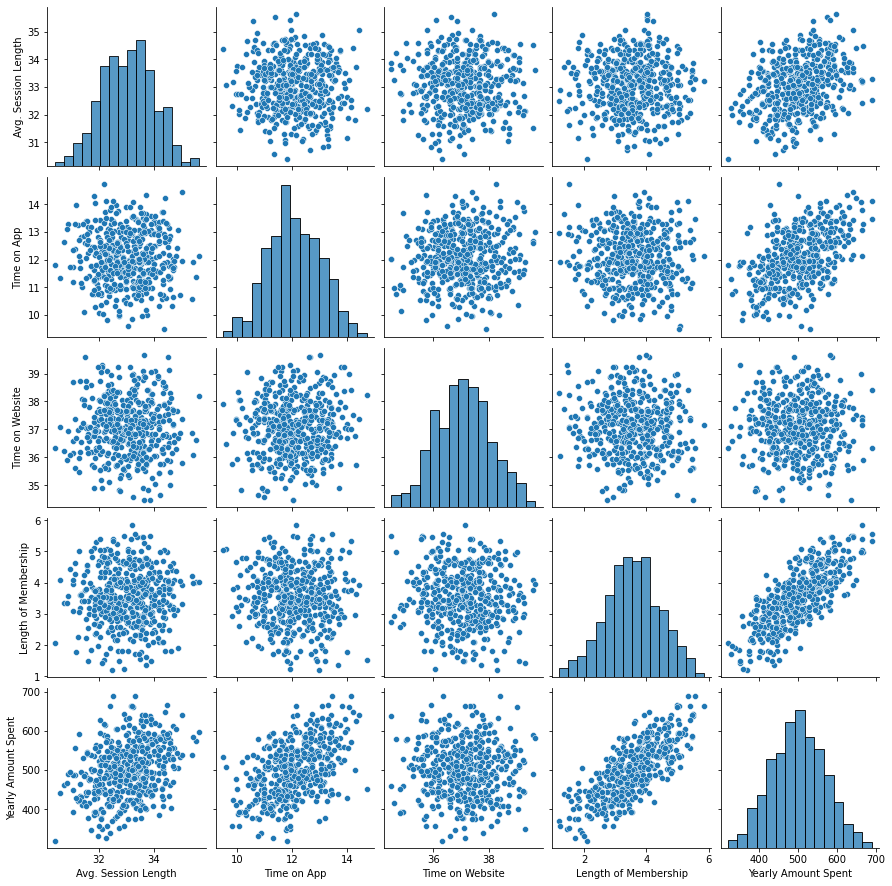

In [24]:
sns.pairplot(df)

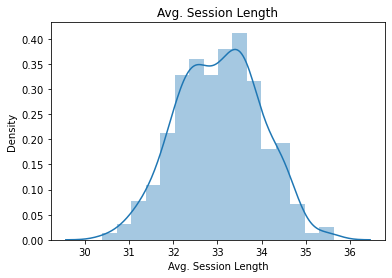

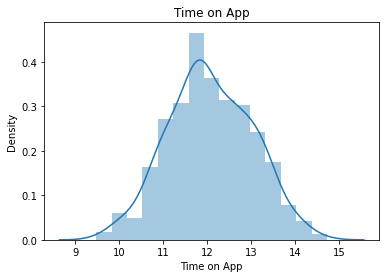

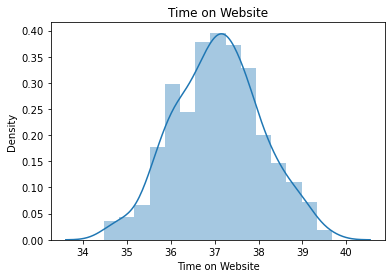

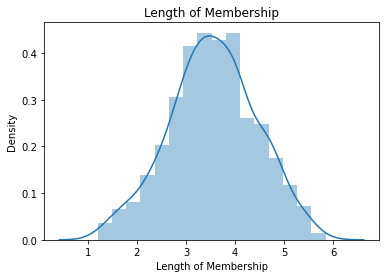

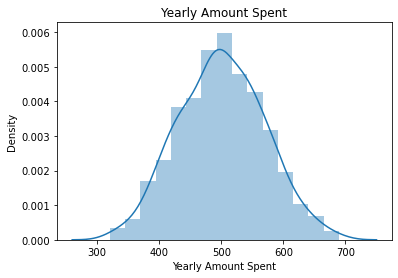

In [25]:
for i in df.columns:
    fig=sns.distplot(df[i]);
    fig.set_title(f"{i}")
    plt.show()

## JointPlot

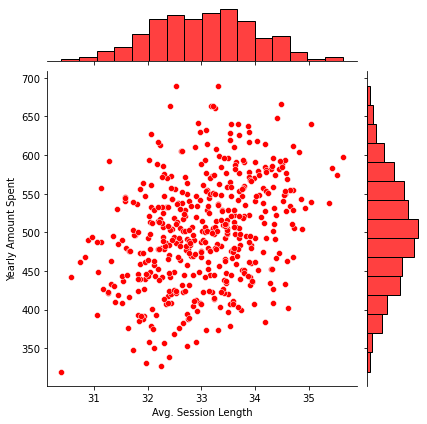

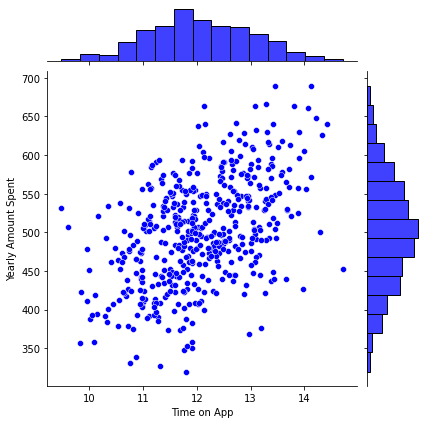

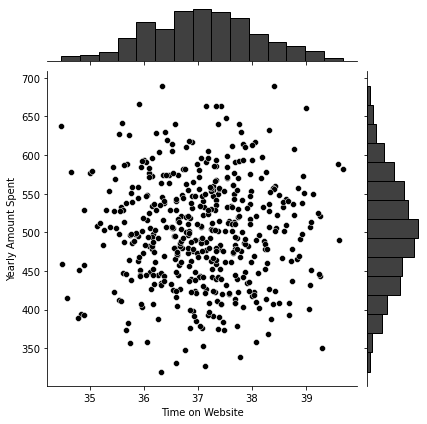

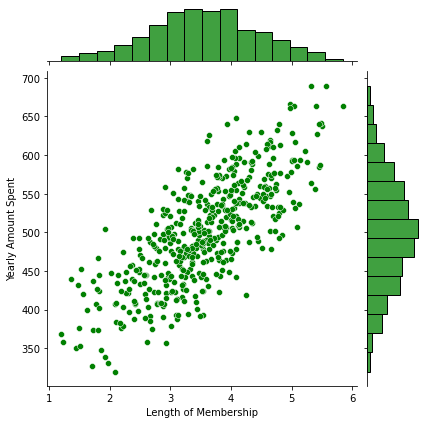

In [26]:
x_column_name = ['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
y_column_name = ['Yearly Amount Spent']
color=["red","blue","black","green"]
for i,j in zip(x_column_name,color):
    sns.jointplot(x=df[i],y=df['Yearly Amount Spent'],color=j)
    plt.show()

## RegPlot 

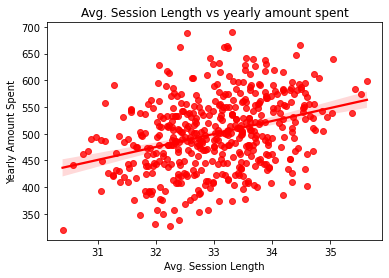

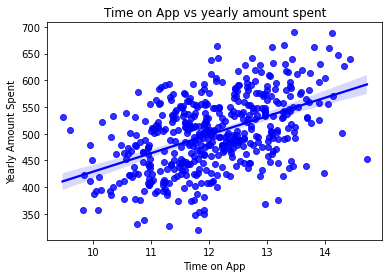

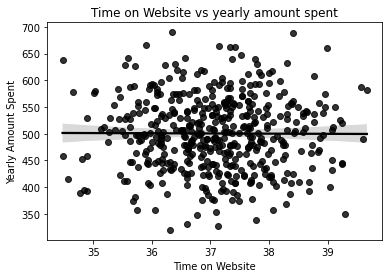

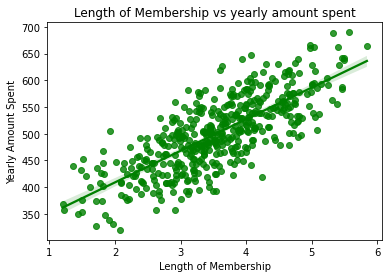

In [27]:
for i,j in zip(x_column_name,color):
    sns.regplot(x=df[i],y=df['Yearly Amount Spent'],color=j).set_title(f"{i} vs yearly amount spent")
    plt.show()